<a href="https://colab.research.google.com/github/sameerchauhan360/ML-Project/blob/main/Project_4_Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Including dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

Data collection & processing

In [ ]:
loan_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/loan_dataset.csv')

In [ ]:
# first 5 row of loan dataset
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# statistical measure
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# checking missing values
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# removing missing values
loan_dataset = loan_dataset.dropna()

In [ ]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan_dataset['Gender'].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [ ]:
loan_dataset['Dependents'].value_counts()


0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
loan_dataset = loan_dataset.replace(to_replace='3+', value= 4)

In [ ]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

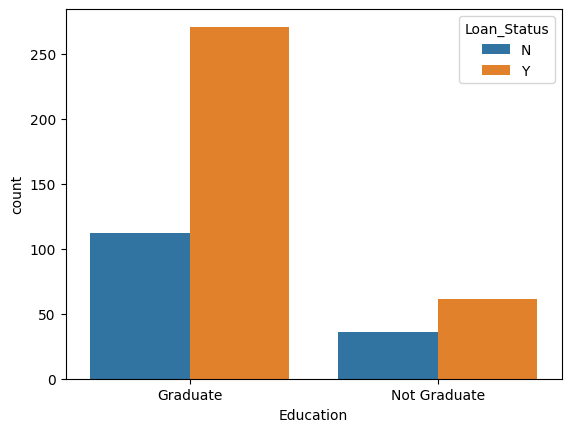

In [ ]:
sns.countplot(x = 'Education', hue='Loan_Status', data = loan_dataset)

<Axes: xlabel='Credit_History', ylabel='count'>

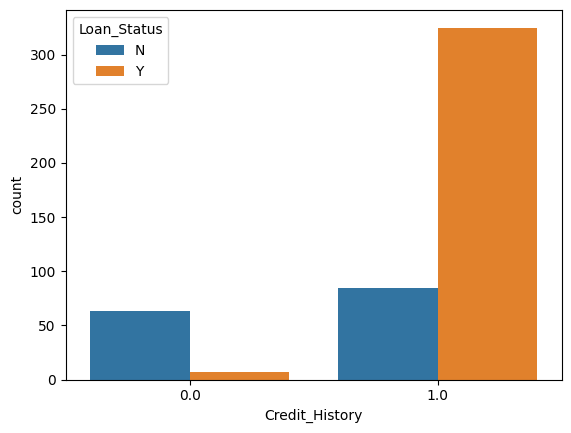

In [ ]:
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data = loan_dataset)

changing the categorical value

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
loan_dataset['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [ ]:
# label Encoding
loan_dataset.replace({'Gender' : {'Male':0, 'Female': 1},'Married': {'Yes':1, 'No':0}, 'Education': {'Graduate':1, 'Not Graduate': 0},
              'Self_Employed': {'Yes': 1, 'No': 0},'Property_Area': {'Rural': 0, 'Semiurban':1, 'Urban': 2}, 'Loan_Status':{'Y': 1, 'N': 0}}, inplace=True)

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


Separating the data & label

In [ ]:
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'], axis = 1)
Y = loan_dataset['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1          1          1              0             4583   
2         0        1          0          1              1             3000   
3         0        1          0          0              0             2583   
4         0        0          0          1              0             6000   
5         0        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          1              0             2900   
610       0        1          4          1              0             4106   
611       0        1          1          1              0             8072   
612       0        1          2          1              0             7583   
613       1        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Splitting the data into test data & train data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


Training the model:
* Support Vector Machine

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
# training the model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation
* Accuracy Score

In [ ]:
X_train_prediction = classifier.predict(X_train)

In [ ]:
X_train_Accuracy_Score = accuracy_score(X_train_prediction, Y_train)
print('Accuracy Score on Training data: ',X_train_Accuracy_Score)

Accuracy Score on Training data:  0.7890625


In [ ]:
# Accuracy on testing data
X_test_prediction = classifier.predict(X_test)

In [ ]:
X_test_Accuracy_Score=accuracy_score(X_test_prediction, Y_test)
print('Accuracy Score on Test data: ', X_test_Accuracy_Score)

Accuracy Score on Test data:  0.8229166666666666


Making a predictive system

In [ ]:
# data = [0,1,0,0,0,7660,0,104,360,0,2]
data = [0,1,1,1,0,3988,0,50,240,1,1]
numpy_data = np.asarray(data)
numpy_data = numpy_data.reshape(1, -1)

In [ ]:
prediction = classifier.predict(numpy_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
if prediction[0] == 1:
  print('Loan Approved')
else : print('Loan Not Approved')

Loan Approved
